# Информация о данных датасета
#### Age: Возраст: Это возраст человека в годах.
#### Gender: Пол: Это пол человека. Он может быть мужским или женским.
#### Polyuria: Полиурия: Это относится к чрезмерному мочеиспусканию, что является распространенным симптомом диабета.
#### Polydipsia: Полидипсия: Это относится к чрезмерной жажде, еще одному распространенному симптому диабета.
#### sudden weight loss: Внезапная потеря веса: Это указывает на то, испытал ли человек необъяснимую потерю веса, что может быть признаком диабета.
#### weakness: Слабость: Это указывает на то, испытывает ли человек общую физическую слабость, потенциальный симптом диабета.
#### Polyphagia: Полифагия: Это относится к чрезмерному голоду, еще одному потенциальному симптому диабета.
#### Genital thrush: Генитальный молочница: Это дрожжевая инфекция, которая может вызывать зуд, болезненность и другие неприятные ощущения в области половых органов. Это может быть более распространено у людей с диабетом.
#### visual blurring: Зрительное размытие: Это указывает на то, испытывает ли человек размытое зрение, что является потенциальным симптомом диабета.
#### Itching: Зуд: указывает на то, испытывает ли человек общий зуд, что может быть симптомом диабета.
#### Irritability: Раздражительность: указывает на то, испытывает ли человек раздражительность, что может быть симптомом диабета.
#### delayed healing: Задержка заживления: указывает на то, испытывает ли человек медленное заживление ран, что может быть симптомом диабета.
#### partial paresis: Частичный парез: относится к частичной потере произвольных движений, что может быть симптомом диабета.
#### muscle stiffness: Мышечная скованность: указывает на то, испытывает ли человек мышечную скованность, что может быть симптомом диабета.
#### Alopecia: Алопеция: относится к выпадению волос, что может быть симптомом диабета.
#### Obesity: Ожирение: указывает на то, страдает ли человек ожирением, что является основным фактором риска развития диабета.
#### class: Класс: наличие или отсутствие диабета

In [819]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from scipy.stats import ttest_ind, f_oneway
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [821]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

diabetes = pd.read_csv('Downloads//diabetes_risk_prediction_dataset.csv')

### Получение общей информации о датасете

In [823]:
diabetes.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [824]:


diabetes.sample(7)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
111,52,Male,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,Positive
459,57,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,No,Positive
490,46,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,Negative
208,54,Male,No,No,Yes,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,Negative
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
225,29,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Negative
145,61,Male,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Positive


In [826]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [828]:
diabetes[diabetes == diabetes.isna()].count()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [830]:
diabetes.notna().count()

Age                   520
Gender                520
Polyuria              520
Polydipsia            520
sudden weight loss    520
weakness              520
Polyphagia            520
Genital thrush        520
visual blurring       520
Itching               520
Irritability          520
delayed healing       520
partial paresis       520
muscle stiffness      520
Alopecia              520
Obesity               520
class                 520
dtype: int64

In [832]:
diabetes.describe(include='all')

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [834]:
diabetes.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [836]:
# Получение данных описательной статистики только для столбца "Age"

diabetes.describe().round(3)

,Age
count,520.000
mean,48.029
std,12.151
min,16.000
25%,39.000
50%,47.500
75%,57.000
max,90.000


### Информация о наблюдаемых, разделенных по гендерной принадлежности

In [838]:
# Получение данных о количестве обоих гендеров: мужчин и женщин в датасете

gender = diabetes['Gender'].value_counts()

gender

Gender
Male      328
Female    192
Name: count, dtype: int64

In [840]:
# Получение данных о количестве выявленного диабета или его отсутствия

total_number = diabetes['class'].value_counts()

total_number

class
Positive    320
Negative    200
Name: count, dtype: int64

In [842]:
# Определение количества людей обоего пола, у которых отрицательный или положительный результаты диагноза

gen_class = diabetes.groupby(['Gender', 'class'])['class'].apply(lambda x: x.count())

gen_class

Gender  class   
Female  Negative     19
        Positive    173
Male    Negative    181
        Positive    147
Name: class, dtype: int64

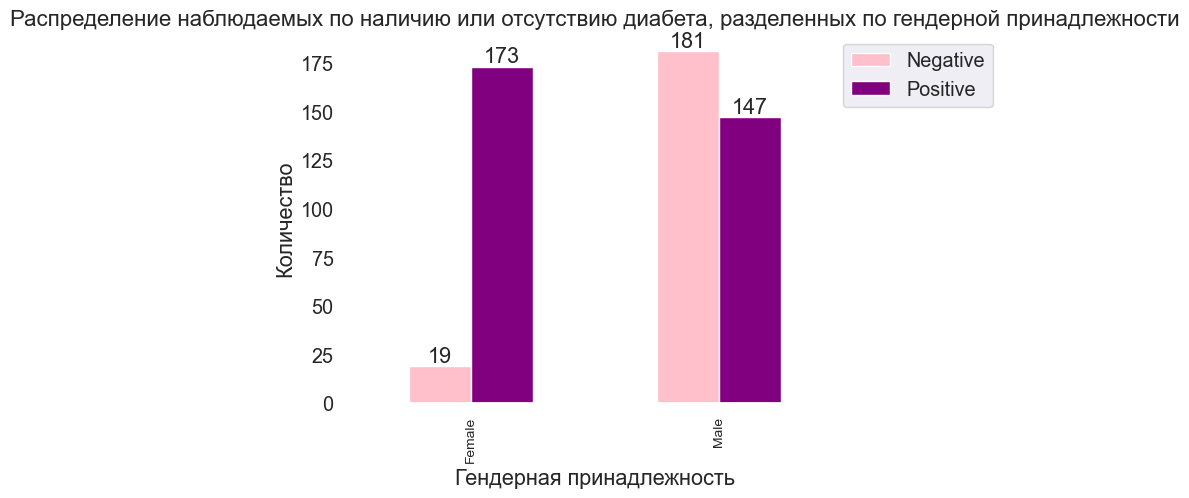

In [844]:
# Построение соответствующей диаграммы

ax = pd.crosstab(diabetes['Gender'], diabetes['class']).plot.bar(color=['pink', 'purple'])
ax.set_facecolor('white')

plt.legend(loc=(1, 0.8))
plt.title('Распределение наблюдаемых по наличию или отсутствию диабета, разделенных по гендерной принадлежности')
plt.xlabel('Гендерная принадлежность')
plt.ylabel('Количество');

ax.grid(False)
   
for i in ax.containers:
    ax.bar_label(i)

In [846]:
# Выявление процентного соотношения:

# 1) процент женщин, у которых диагностирован и НЕ диагностирован диабет от общего количества женщин и от 
# общего количества человек 
ffem_with_diabetes = ((gen_class['Female']['Positive'] / diabetes['Gender'][diabetes['Gender'] == 'Female'].count()) * 100).round(2) # процент женщин с диабетом от общего числа женщин
fem_no_diabetes = ((gen_class['Female']['Negative'] / diabetes['Gender'][diabetes['Gender'] == 'Female'].count()) * 100).round(2) # процент женщин без дибета от общего количества женщин

f_d = ((gen_class['Female']['Positive'] / diabetes['Gender'].count()) 
       * 100).round(2) # процент женщин с диабетом от общего количетва наблюдаемых

f_no_d = ((gen_class['Female']['Negative'] / diabetes['Gender'].count())
          * 100).round(2) # процент женщин без диабета от общего количетва наблюдаемых


# 2) процент мужчин, у которых диагностирован и НЕ диагностирован диабет от общего количества мужчин и от общего 
# количества человек
male_with_diabetes = ((gen_class['Male']['Positive'] / diabetes['Gender'][diabetes['Gender'] == 'Male'].count()) 
                      * 100).round(2) # процент мужчин с диабетом от общего числа мужчин

male_no_diabetes = ((gen_class['Male']['Negative'] / diabetes['Gender'][diabetes['Gender'] == 'Male'].count())
                    * 100).round(2) # процент мужчин без дибета от общего количества мужчин

m_d = ((gen_class['Male']['Positive'] / diabetes['Gender'].count()) * 100).round(2) 
# процент мужчин с диабетом от общего количетва наблюдаемых

m_no_d = ((gen_class['Male']['Negative'] / diabetes['Gender'].count()) * 100).round(2) 
# процент мужчин без диабета от общего количетва наблюдаемых

print(f'Процент женщин с диабетом от общего количества женщин: {ffem_with_diabetes}')
print(f'Процент женщин без дибета от общего количества женщин: {fem_no_diabetes}')
print('-' * 60)
print(f'Процент женщин с диабетом от общего количеcтва наблюдаемых: {f_d}')
print(f'Процент женщин без диабета от общего количетва наблюдаемых: {f_no_d}')
print('-' * 60)
print(f'Процент мужчин с диабетом от общего количества мужчин: {male_with_diabetes}')
print(f'Процент мужчин без дибета от общего количества мужчин: {male_no_diabetes}')
print('-' * 60)
print(f'Процент мужчин с диабетом от общего количетва наблюдаемых: {m_d}')
print(f'Процент мужчин без диабета от общего количетва наблюдаемых: {m_no_d}')



Процент женщин с диабетом от общего количества женщин: 90.1
Процент женщин без дибета от общего количества женщин: 9.9
------------------------------------------------------------
Процент женщин с диабетом от общего количеcтва наблюдаемых: 33.27
Процент женщин без диабета от общего количетва наблюдаемых: 3.65
------------------------------------------------------------
Процент мужчин с диабетом от общего количества мужчин: 44.82
Процент мужчин без дибета от общего количества мужчин: 55.18
------------------------------------------------------------
Процент мужчин с диабетом от общего количетва наблюдаемых: 28.27
Процент мужчин без диабета от общего количетва наблюдаемых: 34.81


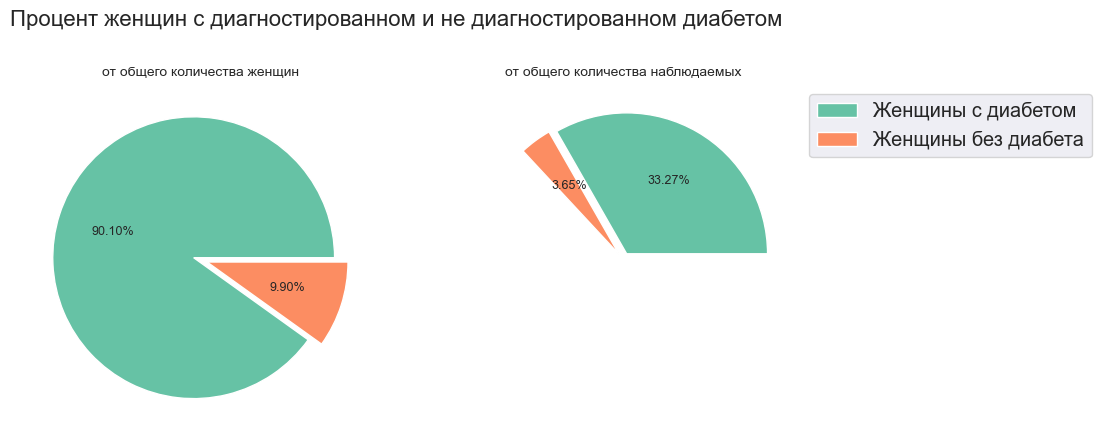

In [848]:
# Построение соответствующей круговой диаграммы для женщин

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

# Постороение первого подграфика
values = [ffem_with_diabetes, fem_no_diabetes]
ax1.pie(values, colors = sns.color_palette('Set2'), autopct = '%1.2f%%', explode=[0.05, 0.05], textprops={'fontsize':9}) 
ax1.set_title('от общего количества женщин', fontdict={"fontsize":10})

# Построение второго подграфика
values = [f_d, f_no_d, m_d, m_no_d]
patches, texts, autotexts = ax2.pie(values, colors = sns.color_palette('Set2'), autopct = '%1.2f%%', explode=[0.05, 0.05, 0.05, 0.05], textprops={'fontsize':9}) 
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), labels = ['Женщины с диабетом', 'Женщины без диабета'])
ax2.set_title('от общего количества наблюдаемых', fontdict={"fontsize":10})

# Скрытие 2-го и 3-го элементов второго подграфика
patches[2].set_visible(False)
texts[2].set_visible(False)
autotexts[2].set_visible(False)

patches[3].set_visible(False)
texts[3].set_visible(False)
autotexts[3].set_visible(False)

fig.suptitle('Процент женщин с диагностированном и не диагностированном диабетом ', fontsize=16)
fig.subplots_adjust(top=1.35)

plt.show()


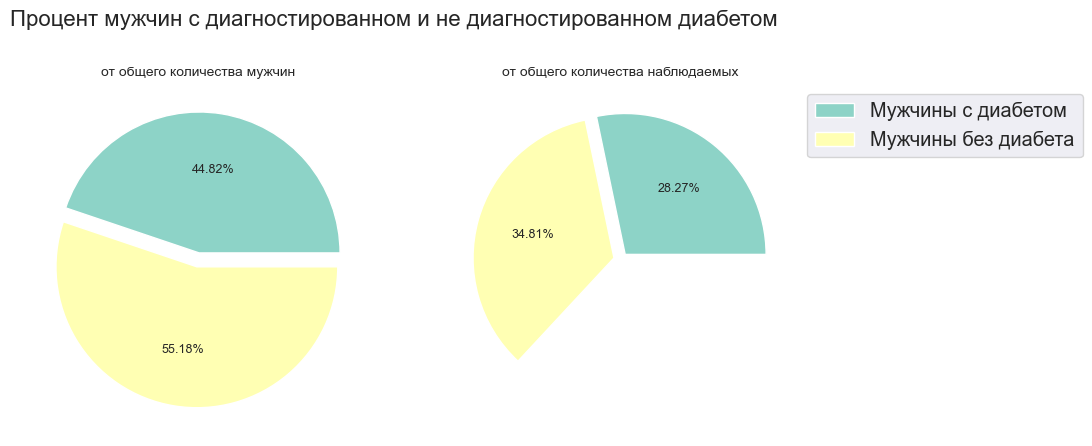

In [850]:
# Построение соответствующей круговой диаграммы для мужчин

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))

# Постороение первого подграфика
values = [male_with_diabetes, male_no_diabetes]
ax1.pie(values, colors = sns.color_palette('Set3'), autopct = '%1.2f%%', explode=[0.05, 0.05], textprops={'fontsize':9}) 
ax1.set_title('от общего количества мужчин', fontdict={"fontsize":10})

# Построение второго подграфика
values = [m_d, m_no_d, f_d, f_no_d]
patches, texts, autotexts = ax2.pie(values, colors = sns.color_palette('Set3'), autopct = '%1.2f%%', 
                                    explode=[0.05, 0.05, 0.05, 0.05], textprops={'fontsize':9}) 
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), labels = ['Мужчины с диабетом', 'Мужчины без диабета'])
ax2.set_title('от общего количества наблюдаемых', fontdict={"fontsize":10})

# Скрытие 2-го и 3-го элементов второго подграфика
patches[2].set_visible(False)
texts[2].set_visible(False)
autotexts[2].set_visible(False)

patches[3].set_visible(False)
texts[3].set_visible(False)
autotexts[3].set_visible(False)

fig.suptitle('Процент мужчин с диагностированном и не диагностированном диабетом ', fontsize=16)
fig.subplots_adjust(top=1.35)

plt.show()

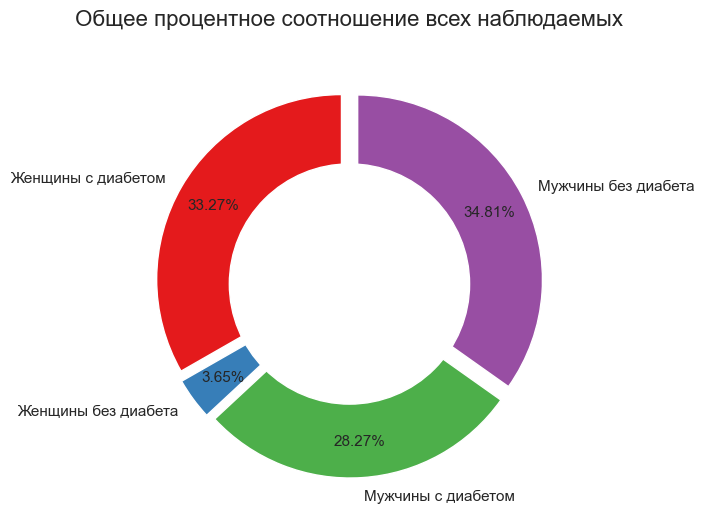

In [852]:
# Построение общей круговой диаграммы

sns.set(font_scale = 1.3)
plt.figure(figsize=(6, 6))
 
plt.pie( x=[f_d, f_no_d, m_d, m_no_d], labels=['Женщины с диабетом', 'Женщины без диабета', 'Мужчины с диабетом', 
        'Мужчины без диабета'], colors=sns.color_palette('Set1'), startangle=90, autopct='%1.2f%%', 
        pctdistance=0.80, explode=[0.05, 0.05, 0.05, 0.05], textprops={'fontsize':11})
 
    
# Добавление пустоты внутрь круговой диаграммы   
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)


plt.title(label='Общее процентное соотношение всех наблюдаемых', fontdict={'fontsize':16}, pad=20)
    
plt.show()

## Изучение возраста и его закономерностей в представленных данных

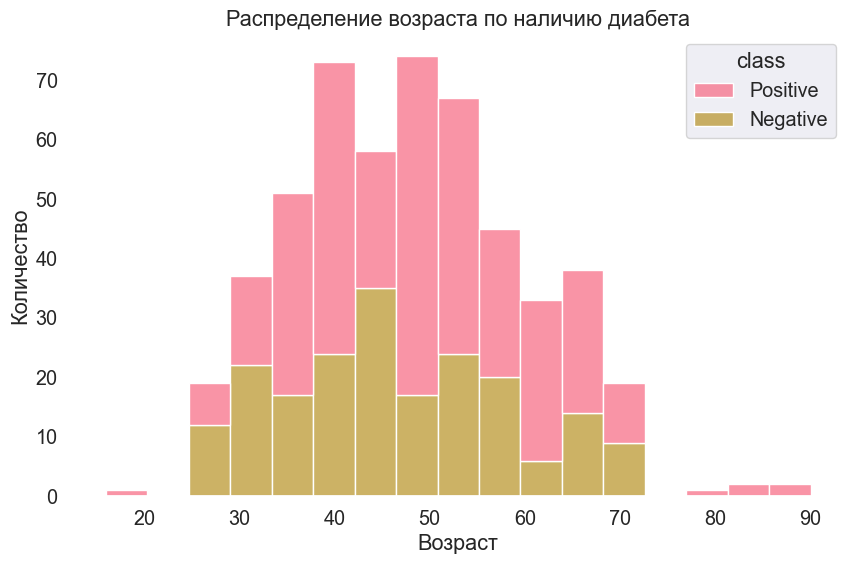

In [854]:
# Гистограмма возраста по наличию диабета

plt.figure(figsize=(10, 6))
sns.set_palette("husl")
ax = plt.axes()
ax.set_facecolor('white')


sns.histplot(data=diabetes, x='Age', hue='class', multiple='stack')
plt.title('Распределение возраста по наличию диабета')
plt.xlabel('Возраст')
plt.ylabel('Количество')

plt.grid(False)


plt.show()

In [856]:
# Разделение количества наблюдаемых на 8 возрастных групп, которые разделены по десятилетиям

group_age = pd.cut(diabetes['Age'], bins=np.linspace(10, 90, 9)).value_counts(sort=False)
group_age

Age
(10.0, 20.0]      1
(20.0, 30.0]     44
(30.0, 40.0]    123
(40.0, 50.0]    145
(50.0, 60.0]    127
(60.0, 70.0]     66
(70.0, 80.0]     10
(80.0, 90.0]      4
Name: count, dtype: int64

In [858]:
# Переименование индексов для лучшего восприятия

group_age.index.rename('Возраст', inplace=True)
group_age.rename(index={group_age.index[0]: 'от 10 до 20 лет'}, inplace=True)
group_age.rename(index={group_age.index[1]: 'от 21 до 30 лет'}, inplace=True)
group_age.rename(index={group_age.index[2]: 'от 31 до 40 лет'}, inplace=True)
group_age.rename(index={group_age.index[3]: 'от 41 до 50 лет'}, inplace=True)
group_age.rename(index={group_age.index[4]: 'от 51 до 60 лет'}, inplace=True)
group_age.rename(index={group_age.index[5]: 'от 61 до 70 лет'}, inplace=True)
group_age.rename(index={group_age.index[6]: 'от 71 до 80 лет'}, inplace=True)
group_age.rename(index={group_age.index[7]: 'от 81 до 90 лет'}, inplace=True)


group_age

Возраст
от 10 до 20 лет      1
от 21 до 30 лет     44
от 31 до 40 лет    123
от 41 до 50 лет    145
от 51 до 60 лет    127
от 61 до 70 лет     66
от 71 до 80 лет     10
от 81 до 90 лет      4
Name: count, dtype: int64

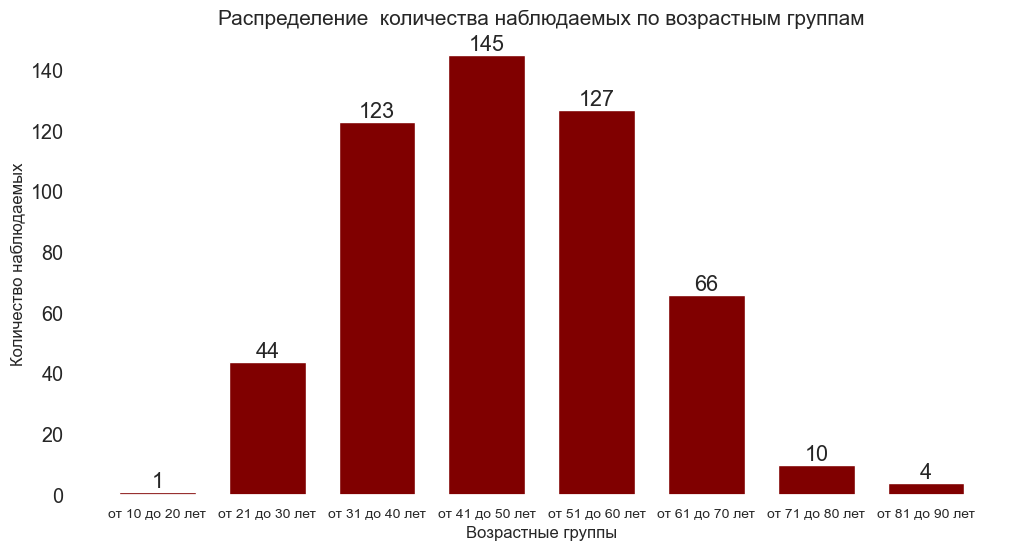

In [860]:
# Визуализация 10 возрастных групп

plt.figure(figsize=(12, 6))
plt.rc('xtick', labelsize=10)

ax = plt.axes()
ax.set_facecolor('white')

plt.bar(group_age.index, group_age.values, width=0.7, color='maroon')

plt.title('Распределение  количества наблюдаемых по возрастным группам', fontsize=15)
plt.xlabel('Возрастные группы', fontsize=12)
plt.ylabel('Количество наблюдаемых', fontsize=12)


ax.grid(False)

for i in ax.containers:
    ax.bar_label(i)
    
plt.show()


In [862]:
# Разделение количества наблюдаемых на 8 возрастных групп, у которых диагностирован диабет

group_age_positive = pd.cut(diabetes[diabetes['class'] == 'Positive']['Age'], bins=np.linspace(10, 90, 9)).value_counts(sort=False)
group_age_positive.index.rename('Возраст', inplace=True)
group_age_positive.rename(index={group_age_positive.index[0]: 'от 10 до 20 лет'}, inplace=True)
group_age_positive.rename(index={group_age_positive.index[1]: 'от 21 до 30 лет'}, inplace=True)
group_age_positive.rename(index={group_age_positive.index[2]: 'от 31 до 40 лет'}, inplace=True)
group_age_positive.rename(index={group_age_positive.index[3]: 'от 41 до 50 лет'}, inplace=True)
group_age_positive.rename(index={group_age_positive.index[4]: 'от 51 до 60 лет'}, inplace=True)
group_age_positive.rename(index={group_age_positive.index[5]: 'от 61 до 70 лет'}, inplace=True)
group_age_positive.rename(index={group_age_positive.index[6]: 'от 71 до 80 лет'}, inplace=True)
group_age_positive.rename(index={group_age_positive.index[7]: 'от 81 до 90 лет'}, inplace=True)

group_age_positive

Возраст
от 10 до 20 лет     1
от 21 до 30 лет    14
от 31 до 40 лет    84
от 41 до 50 лет    87
от 51 до 60 лет    78
от 61 до 70 лет    49
от 71 до 80 лет     3
от 81 до 90 лет     4
Name: count, dtype: int64

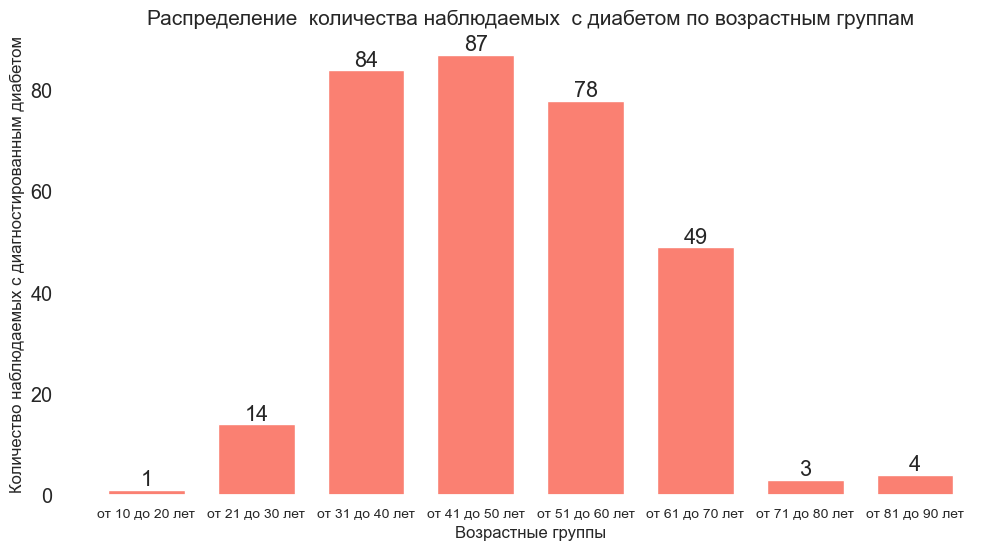

In [864]:
# Визуализация 10 возрастных групп с диагностированным диабетом

plt.figure(figsize=(12, 6))
plt.rc('xtick', labelsize=10)

ax = plt.axes()
ax.set_facecolor('white')

plt.bar(group_age_positive.index, group_age_positive.values, width=0.7, color='salmon')

plt.title('Распределение  количества наблюдаемых  с диабетом по возрастным группам', fontsize=15)
plt.xlabel('Возрастные группы', fontsize=12)
plt.ylabel('Количество наблюдаемых с диагностированным диабетом', fontsize=12)


for i in ax.containers:
    ax.bar_label(i)
    
plt.show()

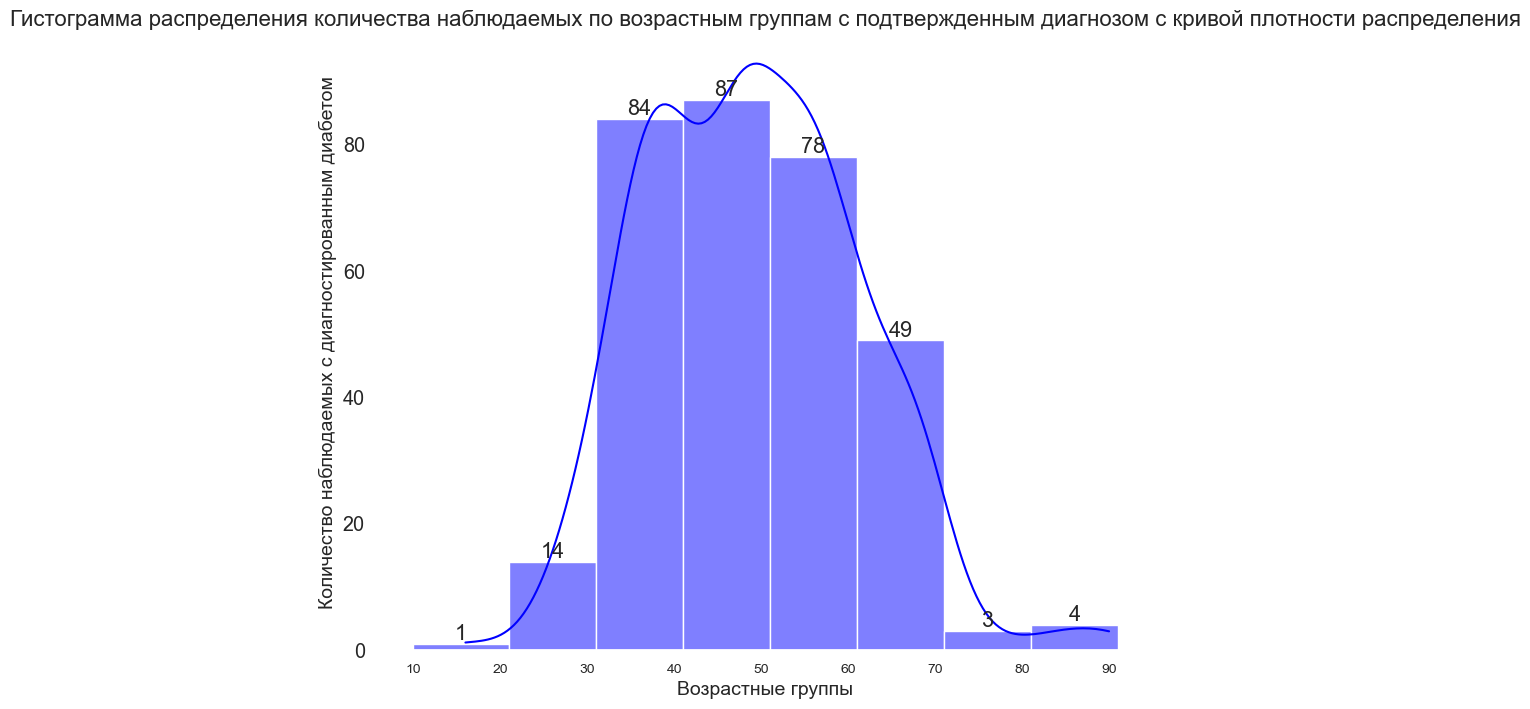

In [866]:
# Построение гистограммы распределения количества наблюдаемых с кривой плотности распределения

plt.figure(figsize=(10, 8))

plt.rc('axes', titlesize=16)

ax = plt.axes()
ax.set_facecolor('white')

plt.title('Гистограмма распределения количества наблюдаемых по возрастным группам с подтвержденным диагнозом с кривой плотности распределения')
plt.xlabel('Возрастные группы', fontsize=14)
plt.ylabel('Количество наблюдаемых с диагностированным диабетом', fontsize=14)

bins = [10.0, 21.0, 31.0, 41.0, 51.0, 61.0, 71.0, 81.0, 91.0]
sns.histplot(data = diabetes[diabetes['class'] == 'Positive']['Age'], bins=bins, kde=True, color='blue')

for i in ax.containers:
    ax.bar_label(i)

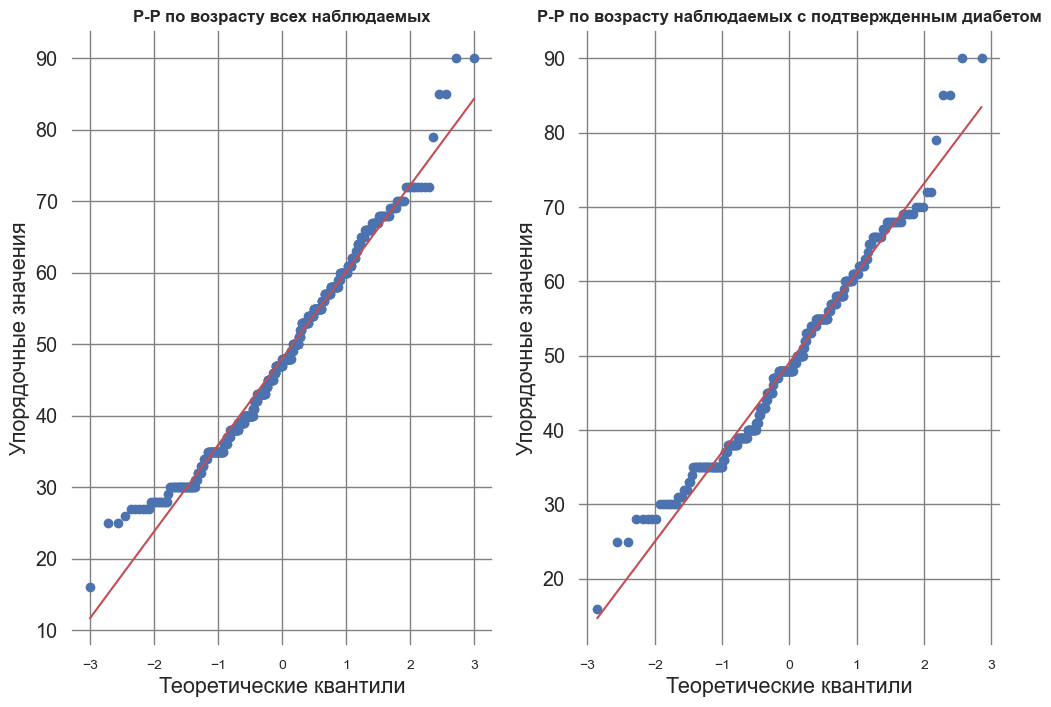

In [868]:
# Построение графика P-P для дополнительного определения нормального распредления по возрасту всех наблюдаемых
## Объективно видно, что выборки по возрасту всех наблюдаемых и только тех, у кого подвержден диабет, распределены нормально

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))


ax[0].set_facecolor('white')
ax[0].grid(color='grey')

ax[1].set_facecolor('white')
ax[1].grid(color='grey')

sps.probplot(diabetes['Age'], dist='norm', plot=ax[0], )
ax[0].set_title('P-P по возрасту всех наблюдаемых', fontsize=12, fontweight='bold')
ax[0].set_xlabel('Теоретические квантили')
ax[0].set_ylabel('Упорядочные значения')

sps.probplot(diabetes[diabetes['class'] == 'Positive']['Age'], dist='norm', plot=ax[1])
ax[1].set_title('P-P по возрасту наблюдаемых с подтвержденным диабетом', fontsize=12, fontweight='bold')
ax[1].set_xlabel('Теоретические квантили')
ax[1].set_ylabel('Упорядочные значения')

plt.show()

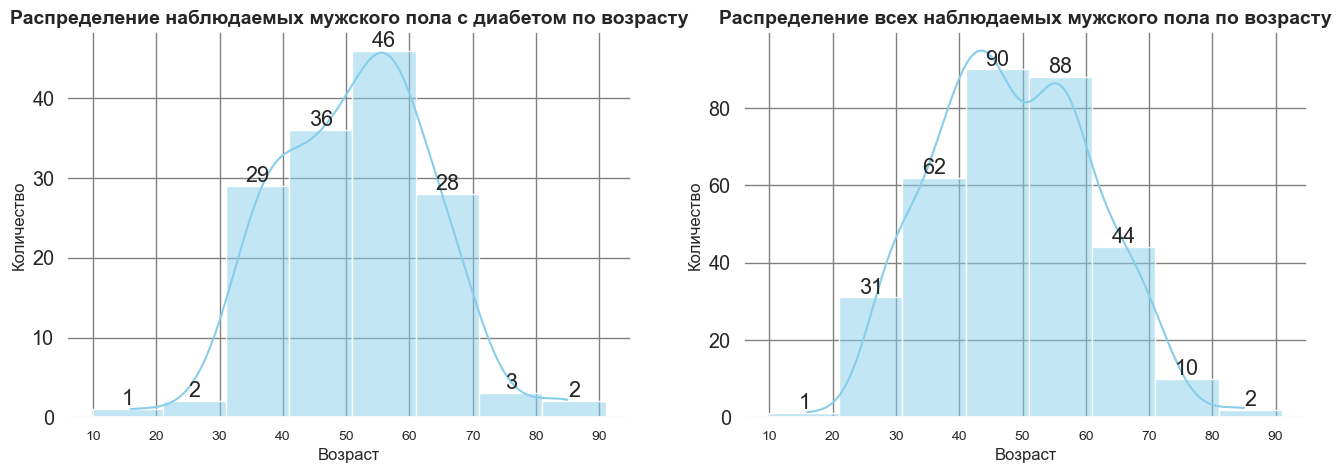

In [870]:
# Построение двух гистограмм с кривыми плотности распредления для анализа распределения наблюдаемых всех лиц 
# мужского пола и только тех, у кого диагностирован диабет, разделенных по возрастным группам


fig, ax = plt.subplots(1, 2, figsize=(16, 5), sharey=False)


ax[0].set_facecolor('white')
ax[0].grid(color='grey')

ax[1].set_facecolor('white')
ax[1].grid(color='grey')


bins = [10.0, 21.0, 31.0, 41.0, 51.0, 61.0, 71.0, 81.0, 91.0]

sns.histplot(ax=ax[0],x=diabetes[(diabetes['class'] == 'Positive') & (diabetes['Gender'] == 'Male')]['Age'], bins=bins, kde=True, color='skyblue')
sns.histplot(ax=ax[1],x=diabetes[diabetes['Gender'] == 'Male']['Age'], bins=bins, kde=True, color='skyblue')

ax[0].set_title('Распределение наблюдаемых мужского пола с диабетом по возрасту', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Возраст', fontsize=12)
ax[0].set_ylabel('Количество', fontsize=12)

ax[1].set_title('Распределение всех наблюдаемых мужского пола по возрасту', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Возраст', fontsize=12)
ax[1].set_ylabel('Количество', fontsize=12)

for i in ax[0].containers:
    ax[0].bar_label(i)

for i in ax[1].containers:
    ax[1].bar_label(i)

plt.show()

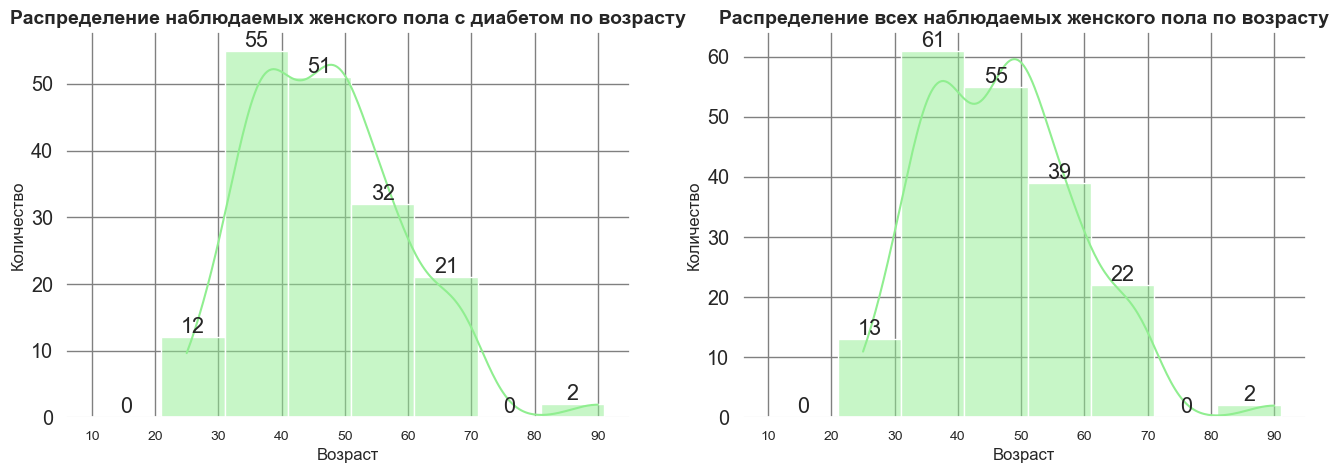

In [872]:
# Построение двух гистограмм с кривыми плотности распредления для анализа распределения наблюдаемых всех лиц 
# женского пола и только тех, у кого диагностирован диабет, разделенных по возрастным группам
fig, ax = plt.subplots(1, 2, figsize=(16, 5), sharey=False)


ax[0].set_facecolor('white')
ax[0].grid(color='grey')

ax[1].set_facecolor('white')
ax[1].grid(color='grey')


bins = [10.0, 21.0, 31.0, 41.0, 51.0, 61.0, 71.0, 81.0, 91.0]

sns.histplot(ax=ax[0],x=diabetes[(diabetes['class'] == 'Positive') & (diabetes['Gender'] == 'Female')]['Age'], bins=bins, kde=True, color='lightgreen')
sns.histplot(ax=ax[1],x=diabetes[diabetes['Gender'] == 'Female']['Age'], bins=bins, kde=True, color='lightgreen')

ax[0].set_title('Распределение наблюдаемых женского пола с диабетом по возрасту', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Возраст', fontsize=12)
ax[0].set_ylabel('Количество', fontsize=12)

ax[1].set_title('Распределение всех наблюдаемых женского пола по возрасту', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Возраст', fontsize=12)
ax[1].set_ylabel('Количество', fontsize=12)

for i in ax[0].containers:
    ax[0].bar_label(i)

for i in ax[1].containers:
    ax[1].bar_label(i)


plt.show()

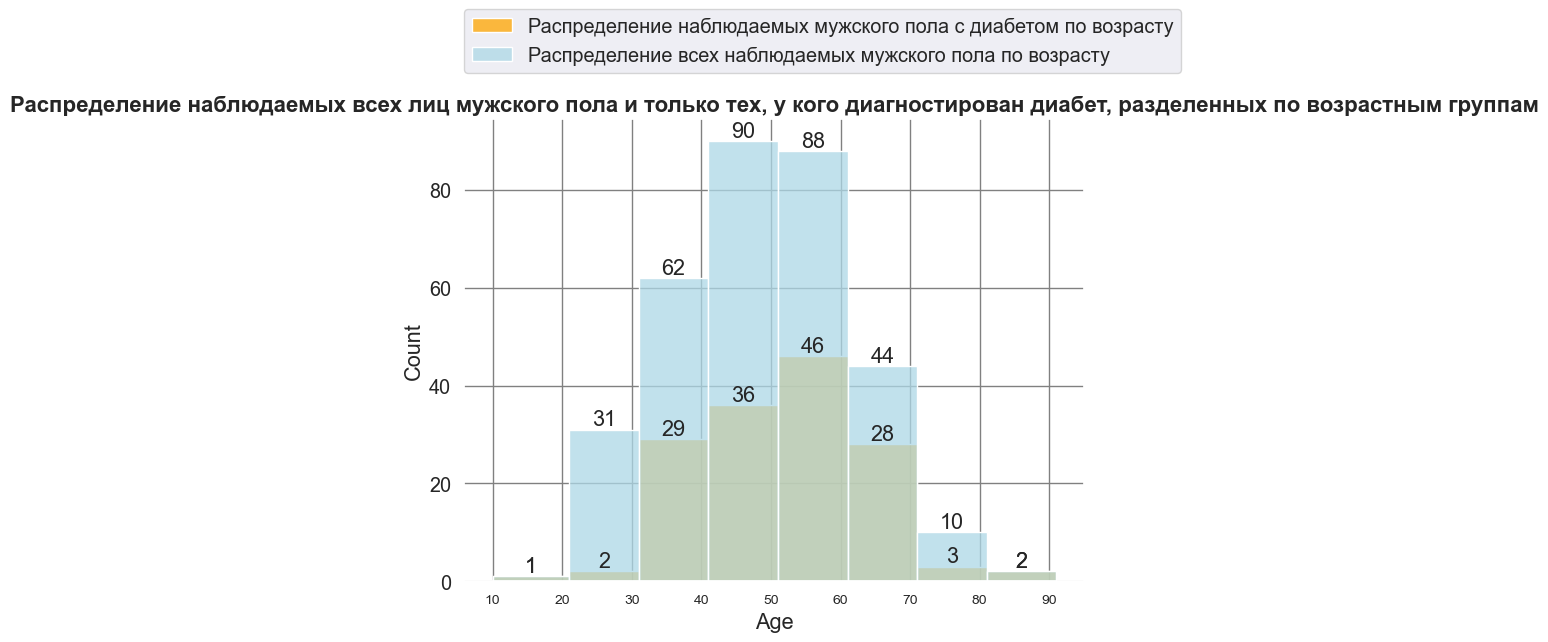

In [874]:
# Построение диаграммы, которая была уже приведена выше, только соединенная в одну для лучшей наглядности и понимания различий

plt.figure(figsize=(8, 6))
ax = plt.axes()

ax.set_facecolor('white')
ax.grid(color='grey')

pos_male = diabetes[(diabetes['class'] == 'Positive') & (diabetes['Gender'] == 'Male')]['Age']
male = diabetes[diabetes['Gender'] == 'Male']['Age']

bins = [10.0, 21.0, 31.0, 41.0, 51.0, 61.0, 71.0, 81.0, 91.0]

sns.histplot(pos_male, color='orange', label='Распределение наблюдаемых мужского пола с диабетом по возрасту', bins=bins)
sns.histplot(male, color='lightblue', label='Распределение всех наблюдаемых мужского пола по возрасту', bins=bins)

plt.title('Распределение наблюдаемых всех лиц мужского пола и только тех, у кого диагностирован диабет, разделенных по возрастным группам', fontweight='bold')
plt.legend(loc=(0, 1.1))

for i in ax.containers:
    ax.bar_label(i)

plt.show()

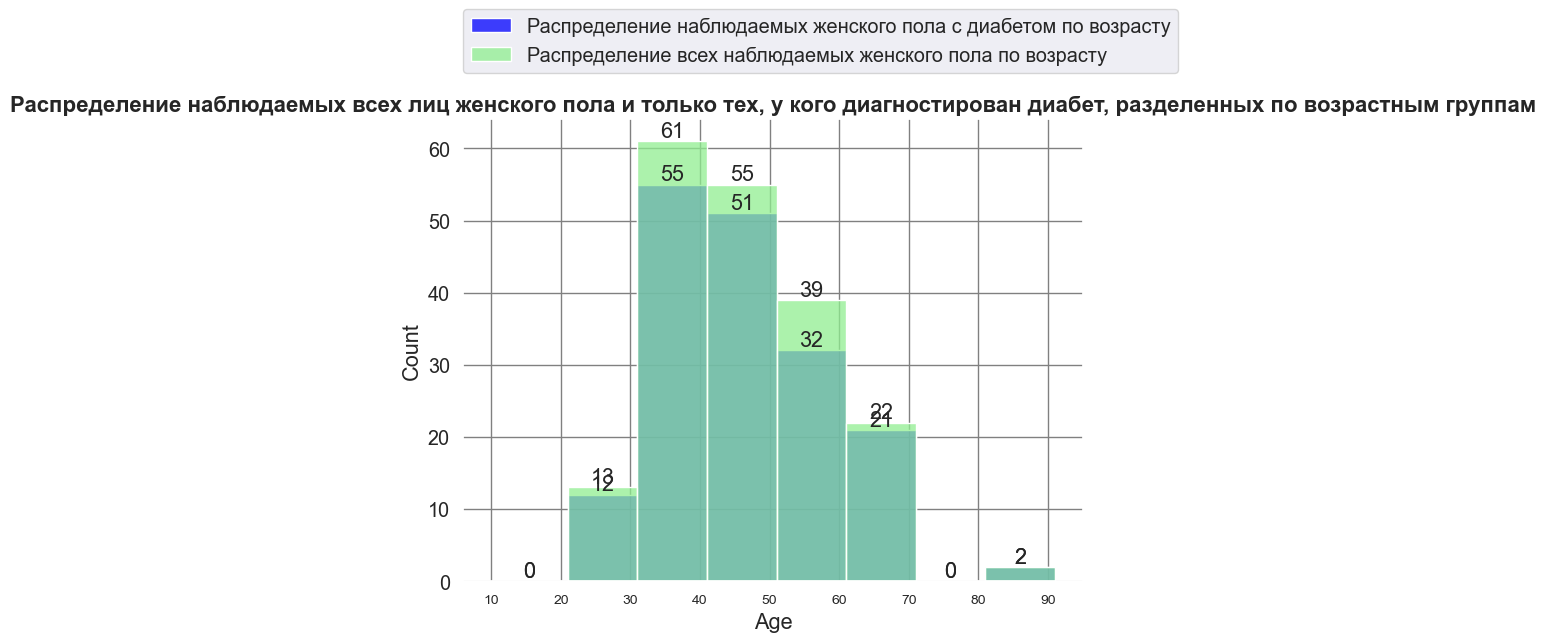

In [876]:
# Построение диаграммы, которая была уже приведена выше, только соединенная в одну для лучшей наглядности и понимания различий

plt.figure(figsize=(8, 6))
ax = plt.axes()

ax.set_facecolor('white')
ax.grid(color='grey')

pos_female = diabetes[(diabetes['class'] == 'Positive') & (diabetes['Gender'] == 'Female')]['Age']
female = diabetes[diabetes['Gender'] == 'Female']['Age']

bins = [10.0, 21.0, 31.0, 41.0, 51.0, 61.0, 71.0, 81.0, 91.0]

sns.histplot(pos_female, color='blue', label='Распределение наблюдаемых женского пола с диабетом по возрасту', bins=bins)
sns.histplot(female, color='lightgreen', label='Распределение всех наблюдаемых женского пола по возрасту', bins=bins)

plt.title('Распределение наблюдаемых всех лиц женского пола и только тех, у кого диагностирован диабет, разделенных по возрастным группам', fontweight='bold')
plt.legend(loc=(0, 1.1))

for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [880]:
replacing = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush',
     'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness',
     'Alopecia', 'Obesity']


diabetes[replacing] = diabetes[replacing].replace({'Yes': 1, 'No': 0})
diabetes.head(5)



,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


##### Выявление закономерности о том, гарантирует ли наличие общих симптомов диабета таких как полиурия, полидипсия, резкая потеря веса, слабость, зуд  окончательную постановку диагноза.

In [882]:
filtering = diabetes[(diabetes['Polydipsia'] == 1) & (diabetes['Polyuria'] == 1) & 
         (diabetes['sudden weight loss'] == 1) & (diabetes['weakness'] == 1)
        & (diabetes['Itching'] == 1) & (diabetes['class'] == 'Positive')].groupby('Gender').size()

filt = diabetes[(diabetes['Polydipsia'] == 1) & (diabetes['Polyuria'] == 1) & 
         (diabetes['sudden weight loss'] == 1) & (diabetes['weakness'] == 1)
        & (diabetes['Itching'] == 1) & (diabetes['class'] == 'Negative')].groupby('Gender').sum()


filt = ['Отсутствие зависимости' if filt.isna else filt.value_counts()]
filt = ' '.join(filt)


print(f'Количество мужчин и женщин, у которых есть в наличии общие симптомы диабета и поставлен соответствующий диагноз: \n {filtering}')
print('-' * 50)
print(f'Количество мужчин и женщин, у которых есть в наличии общие симптомы диабета и НЕ поставлен соответствующий диагноз: \n * {filt} *')


# Как вывод: наличие общих симптомов диабета гарантирует наличие диабета в данной выборке.



Количество мужчин и женщин, у которых есть в наличии общие симптомы диабета и поставлен соответствующий диагноз: 
 Gender
Female    39
Male      19
dtype: int64
--------------------------------------------------
Количество мужчин и женщин, у которых есть в наличии общие симптомы диабета и НЕ поставлен соответствующий диагноз: 
 * Отсутствие зависимости *


## Объединение симптомов по группам и нахождение корреляции между наличием этой группы симптомов и положительного диагноза диабета


#### 1. Симптомы, связанные с гипергликемией (высокий уровень сахара в крови): Polydipsia, Polyuria, Polyphagia


In [884]:
hyperglicemia_pos = diabetes[(diabetes['Polydipsia'] == 1) & (diabetes['Polyuria'] == 1) & 
                             (diabetes['Polyphagia'] == 1) & (diabetes['class'] == 'Positive')].groupby('Gender').size()

hyperglicemia_neg = diabetes[(diabetes['Polydipsia'] == 1) & (diabetes['Polyuria'] == 1) & 
                             (diabetes['Polyphagia'] == 1) & (diabetes['class'] == 'Negative')].groupby('Gender').size()


hyperglicemia_neg = ['Отсутствие зависимости' if hyperglicemia_neg.isna else filt.value_counts()]
hyperglicemia_neg = ' '.join(hyperglicemia_neg)

print(f'Количество мужчин и женщин, у которых есть в наличии гипергликемические симптомы диабета и поставлен соответствующий диагноз: \n {hyperglicemia_pos}')
print('-' * 100)
print(f'Количество мужчин и женщин, у которых есть в наличии гипергликемические симптомы диабета и НЕ поставлен соответствующий диагноз: \n* {hyperglicemia_neg} *')



# Как вывод: наличие общих симптомов диабета гарантирует наличие диабета в данной выборке.


Количество мужчин и женщин, у которых есть в наличии гипергликемические симптомы диабета и поставлен соответствующий диагноз: 
 Gender
Female    81
Male      49
dtype: int64
----------------------------------------------------------------------------------------------------
Количество мужчин и женщин, у которых есть в наличии гипергликемические симптомы диабета и НЕ поставлен соответствующий диагноз: 
* Отсутствие зависимости *


#### 2. Симптомы, связанные с нарушением обмена веществ: weakness, sudden weight loss, partial paresis

In [886]:
digestion_disorder_pos = diabetes[(diabetes['weakness'] == 1) & (diabetes['sudden weight loss'] == 1) 
                                  & (diabetes['muscle stiffness'] == 1) & (diabetes['partial paresis'] == 1) 
                                  & (diabetes['class'] == 'Positive')].groupby('Gender').size()

digestion_disorder_neg = diabetes[(diabetes['weakness'] == 1) & (diabetes['sudden weight loss'] == 1) 
                                  & (diabetes['muscle stiffness'] == 1) & (diabetes['partial paresis'] == 1) 
                                  & (diabetes['class'] == 'Negative')].groupby('Gender').size()

print(f'Количество мужчин и женщин, у которых есть в наличии симптомы нарушения обмена веществ и поставлен соответствующий диагноз: \n {digestion_disorder_pos}')
print('-' * 100)
print(f'Количество мужчин и женщин, у которых есть в наличии симптомы нарушения обмена веществ и НЕ поставлен соответствующий диагноз: \n {digestion_disorder_neg}')
 
    

# Как вывод: наличие общих симптомов диабета практически гарантирует наличие диабета в данной выборке.    

Количество мужчин и женщин, у которых есть в наличии симптомы нарушения обмена веществ и поставлен соответствующий диагноз: 
 Gender
Female    43
Male      17
dtype: int64
----------------------------------------------------------------------------------------------------
Количество мужчин и женщин, у которых есть в наличии симптомы нарушения обмена веществ и НЕ поставлен соответствующий диагноз: 
 Gender
Male    3
dtype: int64


#### 3. Кожные симптомы: Itching, delayed healing

In [888]:
skin_pos = diabetes[(diabetes['Itching'] == 1) & (diabetes['delayed healing'] == 1) &
                                  (diabetes['class'] == 'Positive')].groupby('Gender').size()

skin_neg = diabetes[(diabetes['Itching'] == 1) & (diabetes['delayed healing'] == 1) &
                                  (diabetes['class'] == 'Negative')].groupby('Gender').size()


print(f'Количество мужчин и женщин, у которых есть в наличии кожные симптомы диабета и поставлен соответствующий диагноз: \n {skin_pos}')
print('-' * 100)
print(f'Количество мужчин и женщин, у которых есть в наличии кожные симптомы диабета и НЕ поставлен соответствующий диагноз: \n {skin_neg}')



# Как вывод: наличие общих симптомов диабета НЕ гарантирует наличие диабета в данной выборке. Более того, для лиц
# мужского пола может говорить об обратном больше, чем в каждом третьем случае.

Количество мужчин и женщин, у которых есть в наличии кожные симптомы диабета и поставлен соответствующий диагноз: 
 Gender
Female    66
Male      29
dtype: int64
----------------------------------------------------------------------------------------------------
Количество мужчин и женщин, у которых есть в наличии кожные симптомы диабета и НЕ поставлен соответствующий диагноз: 
 Gender
Female    13
Male      67
dtype: int64


#### 5. Зрительные симптомы: visual blurring


In [890]:
eye_pos = diabetes[(diabetes['visual blurring'] == 1) & (diabetes['class'] == 'Positive')].groupby('Gender').size()

eye_neg = diabetes[(diabetes['visual blurring'] == 1) & (diabetes['class'] == 'Negative')].groupby('Gender').size()



print(f'Количество мужчин и женщин, у которых есть в наличии проблемы со зрением и поставлен соответствующий диагноз: /n {eye_pos}')
print('-' * 100)
print(f'Количество мужчин и женщин, у которых есть в наличии проблемы со зрением и НЕ поставлен соответствующий диагноз: /n {eye_neg}')
 
    

# Как вывод: наличие общих симптомов диабета НЕ гарантирует наличие диабета в данной выборке.

Количество мужчин и женщин, у которых есть в наличии проблемы со зрением и поставлен соответствующий диагноз: /n Gender
Female    104
Male       71
dtype: int64
----------------------------------------------------------------------------------------------------
Количество мужчин и женщин, у которых есть в наличии проблемы со зрением и НЕ поставлен соответствующий диагноз: /n Gender
Female     8
Male      50
dtype: int64


#### 6. Симптомы, связанные с инфекциями: Genital thrush


In [892]:
genit_pos = diabetes[(diabetes['Itching'] == 1) & (diabetes['Genital thrush'] == 1) & (diabetes['class'] == 'Positive')].groupby('Gender').size()

genit_neg = diabetes[(diabetes['Itching'] == 1) & (diabetes['Genital thrush'] == 1) & (diabetes['class'] == 'Negative')].groupby('Gender').size()


print(f'Количество мужчин и женщин, у которых есть в наличии симптомы диабета, связанные с инфекциями, и поставлен соответствующий диагноз: /n {genit_pos}')
print('-' * 100)
print(f'Количество мужчин и женщин, у которых есть в наличии симптомы диабета, связанные с инфекциями, и НЕ поставлен соответствующий диагноз: /n {genit_neg}')
 
    

# Как вывод: наличие общих симптомов диабета НЕ гарантирует наличие диабета в данной выборке.

Количество мужчин и женщин, у которых есть в наличии симптомы диабета, связанные с инфекциями, и поставлен соответствующий диагноз: /n Gender
Female    12
Male      39
dtype: int64
----------------------------------------------------------------------------------------------------
Количество мужчин и женщин, у которых есть в наличии симптомы диабета, связанные с инфекциями, и НЕ поставлен соответствующий диагноз: /n Gender
Female     4
Male      15
dtype: int64


## Создание корреляционных матриц по симптомам заболевания для мужчин и женщин 

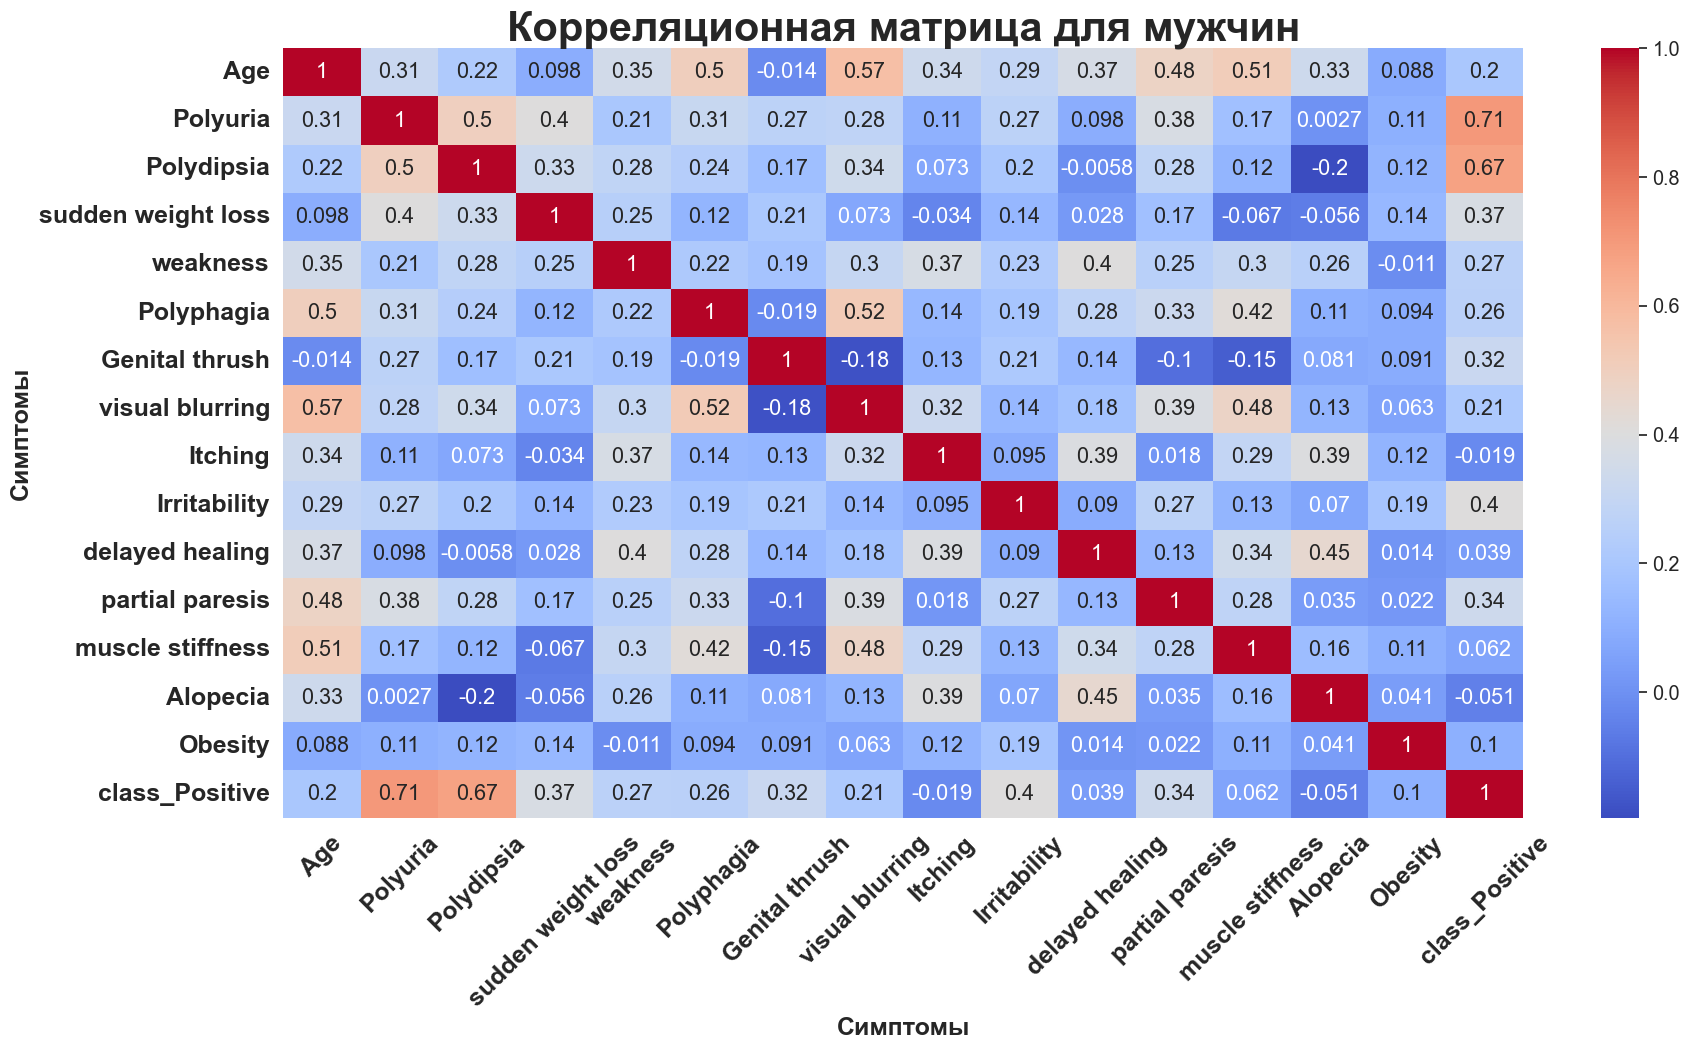

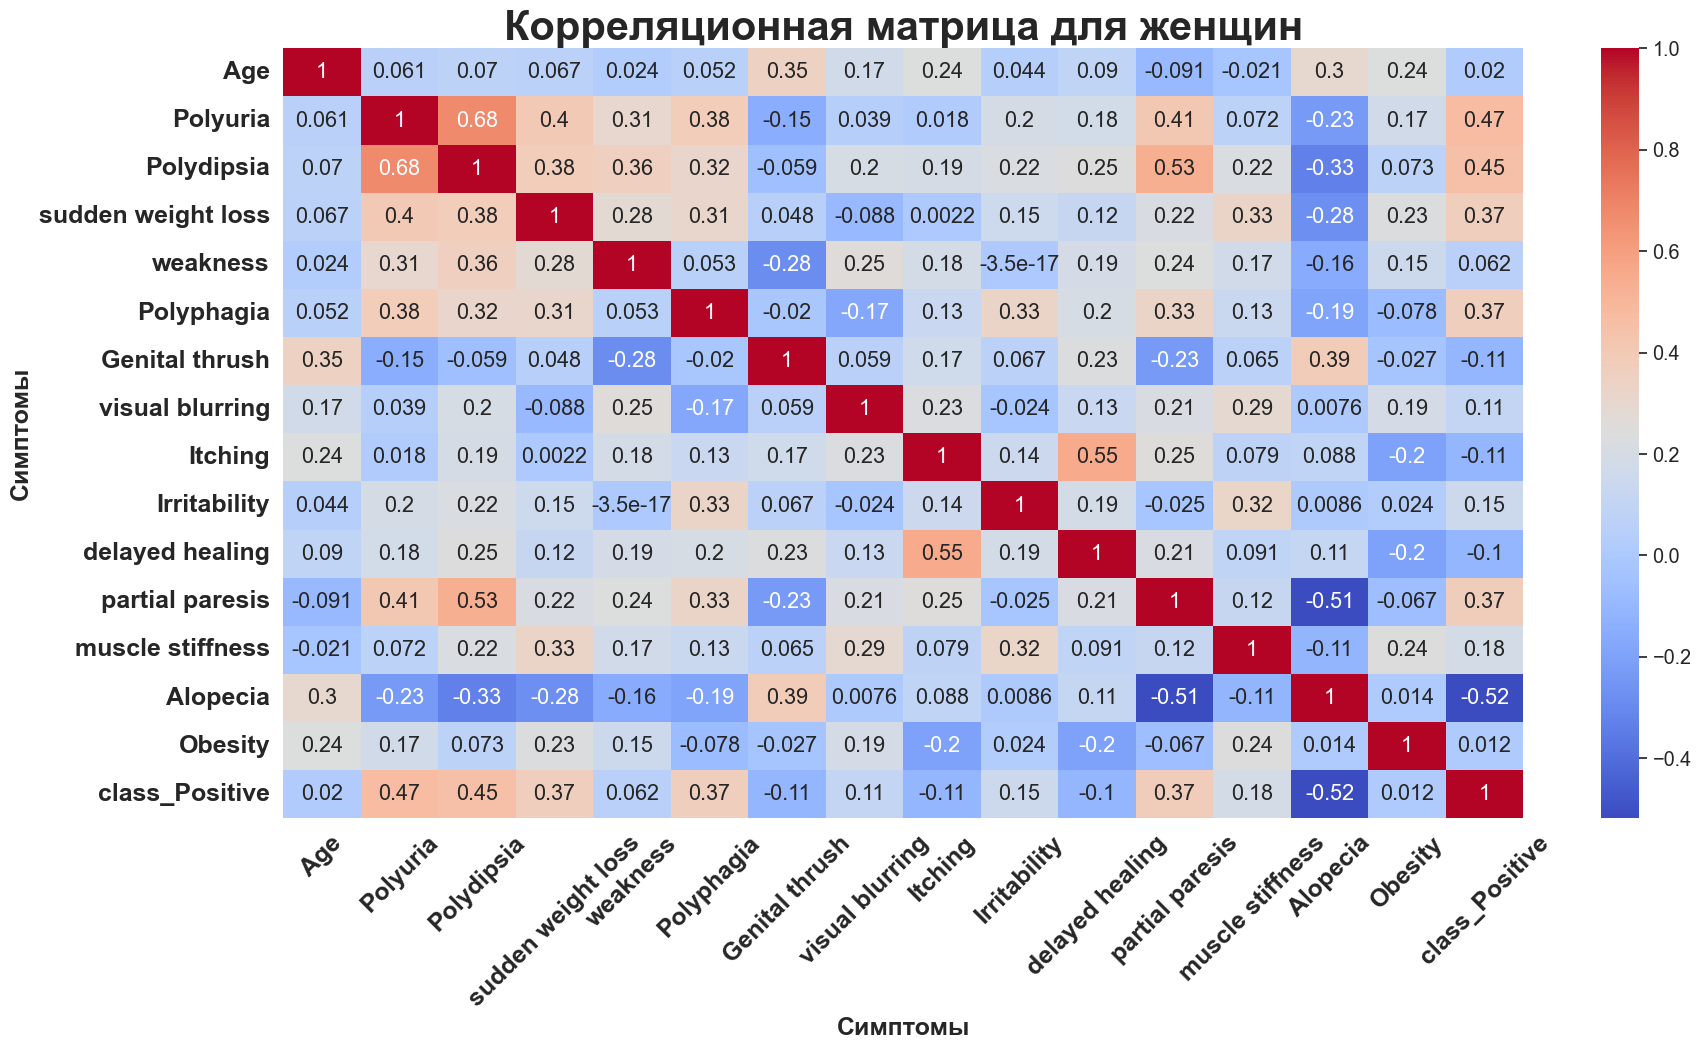

In [893]:
# Разделение данных по полу
diabetes_male = diabetes[diabetes['Gender'] == 'Male']
diabetes_female = diabetes[diabetes['Gender'] == 'Female']

# Преобразование категориальных данных в числовые для мужчин
diabetes_male_encoded = pd.get_dummies(diabetes_male, drop_first=True)

# Преобразование категориальных данных в числовые для женщин
diabetes_female_encoded = pd.get_dummies(diabetes_female, drop_first=True)

# Настройка шрифта
title_font = {'fontsize': 30, 'fontweight': 'bold'}
label_font = {'fontsize': 18, 'fontweight': 'bold'}
tick_font = {'fontsize': 18, 'fontweight': 'bold'}

# Корреляционная матрица для мужчин
corr_matrix_male = diabetes_male_encoded.corr()
plt.figure(figsize=(20, 10))
heatmap_male = sns.heatmap(corr_matrix_male, annot=True, cmap='coolwarm')

heatmap_male.set_title('Корреляционная матрица для мужчин', fontdict=title_font)
heatmap_male.set_xlabel('Симптомы', fontdict=label_font)
heatmap_male.set_ylabel('Симптомы', fontdict=label_font)
heatmap_male.set_xticklabels(heatmap_male.get_xticklabels(), fontdict=tick_font, rotation=45)
heatmap_male.set_yticklabels(heatmap_male.get_yticklabels(), fontdict=tick_font, rotation=0)

plt.show()


# Корреляционная матрица для женщин
corr_matrix_female = diabetes_female_encoded.corr()
plt.figure(figsize=(20, 10))
heatmap_female = sns.heatmap(corr_matrix_female, annot=True, cmap='coolwarm')

heatmap_female.set_title('Корреляционная матрица для женщин', fontdict=title_font)
heatmap_female.set_xlabel('Симптомы', fontdict=label_font)
heatmap_female.set_ylabel('Симптомы', fontdict=label_font)
heatmap_female.set_xticklabels(heatmap_female.get_xticklabels(), fontdict=tick_font, rotation=45)
heatmap_female.set_yticklabels(heatmap_female.get_yticklabels(), fontdict=tick_font, rotation=0)

plt.show()

# Вывод: очевидно, что довольно высокая корреляция наличия диабета наблюдается с симптомами Polyuria, Polydipsia, 
# которые также имеют между собой среднюю корреляцию.

# также, интересно, что в отдельных случаях видно, что есть умеренная корреляция между возрастом и некоторыми 
# симптомами, такими как Polyphagia, visual blurring, partial paresis, muscle stiffness.

## T-Test

In [895]:
# t-тест для сравнения возрастов между группами с диабетом и без

diabetes_yes = diabetes[diabetes['class'] == 'Positive']['Age']
diabetes_no = diabetes[diabetes['class'] == 'Negative']['Age']
t_stat, p_val = ttest_ind(diabetes_yes, diabetes_no)
print(f't-статистика: {t_stat}, p-значение: {p_val}')

    
# Полученные результаты t-теста говорят о том, что согласно t-статистики разница между средними значениями в
# единицах стандратной ошибки довольно значима, а значит разница между группами существенна, 
# а p-значение указывает на то, что оно меньше определенного уровня значимости (< 0.05), значит можно отвергнуть 
# нулевую гипотезу, согласно которой средний возраст людей с диабетом равен среднему возрасту людей без диабета.

# Можно уверенно сказать, что с вероятностью 98.69% (100% - 1.31%), что эта разница не является случайной.

t-статистика: 2.4882300316303065, p-значение: 0.013151253540112713


## ANOVA для симптомов

In [897]:
anova_results = {}

for sym in symptoms:
    groups = [diabetes[diabetes['class'] == val][sym] for val in diabetes['class'].unique()]
    t_stat, p_val = f_oneway(*groups)
    anova_results[sym] = (t_stat, p_val)

print('ANOVA results: ')

for i, j in anova_results.items():
    print(i, j)


# Симптомы с статистически значимыми различиями: Polyuria, Polydipsia, sudden weight loss, weakness, Polyphagia, 
#     Genital thrush, visual blurring, Irritability, partial paresis, muscle stiffness, Alopecia. 
#     Это означает, что для этих симптомов есть значимые различия между группами (с диабетом и без диабета).

# Симптомы без статистически значимых различий: Itching, delayed healing, Obesity. Это означает, что для этих 
#     симптомов нет значимых различий между группами.

ANOVA results: 
Polyuria (412.7384097048473, 6.384837596446927e-68)
Polydipsia (376.4226492606445, 1.9641872780206183e-63)
sudden weight loss (121.97373138366835, 1.3075171846917785e-25)
weakness (32.58506404988484, 1.9229056475692427e-08)
Polyphagia (68.84175921902577, 9.295946196209014e-16)
Genital thrush (6.37821552372636, 0.011850118066800577)
visual blurring (34.91775991163324, 6.238604845339885e-09)
Itching (0.09280281437808426, 0.7607660972340323)
Irritability (51.03099891794766, 3.0996946266209795e-12)
delayed healing (1.1457940905772244, 0.28492983005727185)
partial paresis (119.04653371320038, 4.328222404034279e-25)
muscle stiffness (7.888324873096447, 0.00516334500103074)
Alopecia (39.92659019002698, 5.687734137224101e-10)
Obesity (2.712386107399988, 0.10017843214836702)


## Логистическая регрессия

In [898]:
symptoms = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 
            'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 
            'Alopecia', 'Obesity']

dbt = diabetes.copy()

# Преобразование меток в числовые значения
dbt['class'] = dbt['class'].map({'Negative': 0, 'Positive': 1})

X = dbt[symptoms]
y = dbt['class']



# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели логистической регрессии
log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred = log_regression.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Отчет по модели
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


# Выводы
# Точность модели (85.9%) довольно высокая, что указывает на хорошее общее качество модели.
# Метрики точности и полноты показывают, что модель хорошо справляется с классификацией обоих классов, но точность 
# для класса 1 немного выше, чем для класса 0.
# Матрица ошибок показывает, что модель совершает меньше ошибок при предсказании класса 1 по сравнению с классом 0.
# Это может указывать на небольшой дисбаланс в наборе данных или на то, что модель лучше обучилась на примерах класса 1.
# Таким образом, модель показывает хорошие результаты, особенно для класса 1, но есть небольшие ошибки при 
# классификации класса 0, которые можно попытаться уменьшить, например, за счет дополнительного отбора признаков, 
# балансировки классов или улучшения параметров модели.

Accuracy: 0.8589743589743589
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        54
           1       0.90      0.88      0.89       102

    accuracy                           0.86       156
   macro avg       0.84      0.85      0.85       156
weighted avg       0.86      0.86      0.86       156

[[44 10]
 [12 90]]


#### Построение ROC-кривой

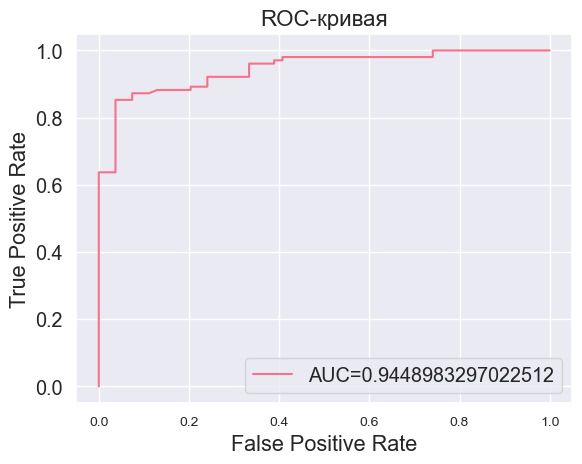

In [900]:
# Определение метрик

y_pred_proba = log_regression.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Построение ROC кривой
plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.legend(loc=4)
plt.title('ROC-кривая')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Кривая находится близко к верхнему левому углу графика, что указывает на высокую чувствительность и низкий уровень
# ложных срабатываний.
# Чем ближе кривая к верхнему левому углу, тем лучше модель различает между классами.
# Чем выше AUC (площадь под кривой), тем точнее модель может предсказывать результаты.

### Дерево решений или случайный лес

In [902]:
# Дерево решений
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print('Отчет по модели Decision Tree:')
print(classification_report(y_test, y_pred_tree))

# Случайный лес
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

print('Отчет по модели Random Forest:')
print(classification_report(y_test, y_pred_forest))


# Accuracy: Оба алгоритма (Decision Tree и Random Forest) показывают высокую точность, но Random Forest немного лучше.
# Precision, Recall, f1-score: Random Forest показывает более высокую точность (precision) для позитивных 
# случаев (1), а Decision Tree - для негативных (0). Однако в общем, Random Forest имеет лучшие значения f1-score.
# Confusion Matrix: Random Forest предсказывает все негативные случаи правильно и делает меньше ошибок на 
# позитивных случаях, что подтверждает его лучшую общую производительность.
# Таким образом, Random Forest является более предпочтительным выбором для данной задачи, так как он показывает 
# немного лучшие результаты по всем основным метрикам.

Отчет по модели Decision Tree:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        54
           1       0.98      0.95      0.97       102

    accuracy                           0.96       156
   macro avg       0.95      0.96      0.95       156
weighted avg       0.96      0.96      0.96       156

Отчет по модели Random Forest:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        54
           1       1.00      0.95      0.97       102

    accuracy                           0.97       156
   macro avg       0.96      0.98      0.97       156
weighted avg       0.97      0.97      0.97       156



In [904]:
# Кластерный анализ: возможность предсказать к какому типу диабета: 1-го или 2-го относится каждый
# наблюдаемый с характерными ему признаками при условии, что уже есть постеаленный диагноз
# Кластер 0 - диабет 1-го типа
# Кластер 1 - диабет 2-го типа

positive_diabetes = diabetes[diabetes['class'] == 'Positive']

# Копирование DataFrame
d_diab = positive_diabetes.copy()

# Кодирование категориальных признаков
repl = ['Gender']
d_diab[repl] = d_diab[repl].replace({'Male': 1, 'Female': 0})

# Применение метода K-средних
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
clusters = kmeans.fit_predict(data_scaled)

# Добавление кластеров в исходный DataFrame
d_diab['Cluster'] = clusters

d_diab.drop('class', axis=1, inplace=True)

# Анализ кластеров
cluster_analysis = d_diab.groupby('Cluster').mean()

cluster_analysis

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
Cluster,,,,,,,,,,,,,,,,
0,42.808696,0.591304,0.556522,0.365217,0.304348,0.400000,0.295652,0.304348,0.330435,0.304348,0.191304,0.234783,0.226087,0.208696,0.330435,0.104348
1,52.585366,0.385366,0.873171,0.892683,0.746341,0.839024,0.756098,0.234146,0.668293,0.580488,0.429268,0.614634,0.809756,0.541463,0.195122,0.239024


In [906]:
d_diab.sample(15)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Cluster
421,61,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
128,32,1,0,1,0,1,1,1,0,1,1,0,0,0,1,0,0
129,48,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,1
300,35,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0
62,55,0,1,1,0,1,1,0,1,1,0,1,1,1,0,0,1
83,48,0,1,1,0,1,0,0,1,1,0,1,1,0,0,0,1
92,40,0,1,1,1,1,0,0,1,0,0,1,1,1,0,0,1
133,16,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
165,40,0,1,1,1,1,0,0,1,0,0,1,1,1,0,0,1
457,48,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1
